<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">SNT</div>
        <div style="display:inline;width:15%;">e8c</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Photographie numérique</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">L'image numérique</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Création de filtres sur les images</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
- Comment agir sur la forme et les couleurs d'une image ?

<div class = "alert alert-info">
    
**Sommaire :**

- <a href=#biblios>Bibliothèques utilisées</a>  
- <a href=#un_point>Lire et modifier le code couleur d'un point</a>  
- <a href=#dimensions>Dimensions d'une image: Lire une ligne </a>  
- <a href=#niveaux_gris>Premiers filtres: Image en niveaux de gris et détection de seuil</a>  
- <a href=#filtres_chromatiques>Filtres chromatiques: Modifer les couleurs</a>  
- <a href=#filtres_geometriques>Filtres géométriques: Modifier la forme</a>
</div>

**Remaque:** Lorque vous rencontrez trois petits points ... C'est qu'il faut les supprimer pour mettre à cet endroit le code attendu.

<div id="biblios"></div>

## Bibliothèques utilisées

Nous allons utiliser deux bibliothèques:
- <a href="https://he-arc.github.io/livre-python/pillow/index.html" >PIL</a>: Dont nous allons principalement nous servir pour ouvrir les fichiers images, en récupérer les données et les modifier
- <a href="https://courspython.com/introduction-courbes.html">matplotlib.pyplot</a>: Dont nous allons nous servir pour afficher les images modifées.  
La bibliothèque **PIL** permet de le faire aussi, mais ici, je souhaite les afficher dans le notebook avec les axes.

<span style="color:red">Il est très important d'exécuter les lignes suivantes pour importer ces bibliothèques, sinon les programmes de cette page ne pourront pas être interprétés!</span>

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

from urllib.request import urlopen  # Pour ouvrir des images sur Internet

### Ouvrir et afficher une image  
Pour ouvrir un fichier image nommé `mon_image.png`, il suffit de faire `img = Image.open("mon_image.png")` par exemple.  
Mais nous souhaitons ici charger une image stockée sur le web, il y a donc une petite étape supplémentaire avec `urlopen()`.

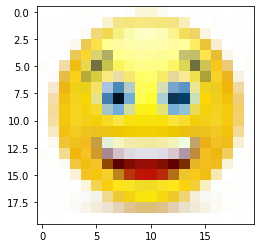

In [2]:
# On récupère d'abord l'adresse d'une image sur Internet
lien_url = "https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/smiley_20_20_RVB.png?raw=true"
# Ouverture de l'image "smiley_20_20_RVB.png" pointées par le l'adresse URL
img = Image.open(urlopen(lien_url))
# Le fichier image est alors 'mémorisé' dans la variable 'img'
plt.imshow(img) # Afficher l'image qui correspond à la variable'img'

Notez que l'origine, de coordonnées (0,0), se situe dans le coin supérieur gauche.

<div id="un_point"></div>

## Lire et modifier le code couleur d'un point
Soit un fichier image nommé `img`, la méthode `img.getpixel((col,lig))` permet de récupérer le code couleur du pixel situé à la ligne `lig` et à la colonne `col`.  
<u>Par exemple</u>: 
- Point A: Colonne  = 0 ; Ligne = 0 ; 
- Point B: Colonne  = 4 ; Ligne = 8 ;  
Les lignes suivantes permettent de récupérer les codes couleurs des points A et B.

In [3]:
# Code couleur du point A
img.getpixel((0,0))

(255, 255, 255)

In [4]:
# Code couleur du point B
img.getpixel((4,8))

(247, 213, 2)

![Coordonnées et code couleur d'un pixel](https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/smiley_20_20_RVB_coordos&code.png?raw=true)

Chaque pixel est composé des trois couleurs fondamentales: <span style="color:red;font-weight:bold">Rouge</span>, <span style="color:green;font-weight:bold">Vert</span> et <span style="color:blue;font-weight:bold">Bleu</span> (Voir cours 8a).  
`getpixel()` renvoie les informations relatives à ces 3 couleurs, dont la valeur est comprise entre **0** et **255**.  

On peut aussi procéder de la façon suivante pour récupérer les valeurs de chaque couleur dans des variables distinctes.

In [5]:
r,v,b = img.getpixel((4,8))
print("Canal Rouge:", r, "Canal Vert:", v, "Canal Bleu:", b)

Canal Rouge: 247 Canal Vert: 213 Canal Bleu: 2


La composante bleue de ce pixel est donc très faible alors que les composantes rouge et verte sont très marquées.  
Ce pixel apparait donc Jaune (Rouge + Vert = Jaune)

Vous pouvez utiliser ce <a href="http://www.proftnj.com/RGB3.htm">site</a> pour composer vos couleurs. 

**A vous de jouer:**  
**Q1 :** D'ailleurs, donnez les codes des couleurs suivantes :  (Remplacez les ... par le code attendu)

In [6]:
Vert = ( 0 , 255 , 0 )
Noir = ( 0 , 0 , 0 )
Blanc = ( 255 , 255 , 255 )
Violet = ( 180 , 0 , 200 ) # Donnez une combinaison possible

**Q2 :** Récupérez le code couleur du point C : Colonne  = 6 ; Ligne = 7 ; 

In [7]:
# Code couleur du point C
img.getpixel((6,7))

(170, 195, 227)

La méthode `putpixel()` permet de forcer le code couleur d'un point de l'image.  
<u>Par exemle:</u> `putpixel((10,8),(0,0,255))` force la couleur bleue au point de coordonnées (10,8).  

Dans le code suivant, nous allons manuellement modifer la couleur de l'oeil à gauche.

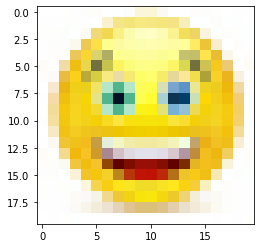

In [8]:
img = Image.open(urlopen(lien_url)) # Je recharge le fichier image dans 'img'
img.putpixel((6,7),(180,230,200)) # Je modifie le point de coordonnées (6,7)
img.putpixel((7,7),(80,180,140))
img.putpixel((8,7),(180,230,200))
img.putpixel((6,8),(80,180,140))
img.putpixel((8,8),(80,180,140))
img.putpixel((6,9),(180,230,200))
img.putpixel((7,9),(80,180,140))
img.putpixel((8,9),(180,230,200))
plt.imshow(img) # J'affiche l'image qui correspond à la variable 'img'

**A vous de jouer:**  
**Q3 :** Placez un point rouge au centre de l'oeil à droite.  
Ou mieux, dessinez un oeil vert au milieu du front en copiant le code précédent et en décalant toutes les coordonnées.

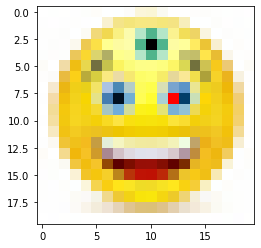

In [14]:
img = Image.open(urlopen(lien_url)) # Je recharge le fichier image dans 'img'
img.putpixel((12,8),(255,0,0)) # Force un point rouge au milieu de l'oeil
# Si vous êtes forme, ajoutez un oeil vert au milieu du front
d = 3
e = -5
img.putpixel((6+d,7+e),(180,230,200))
img.putpixel((7+d,7+e),(80,180,140))
img.putpixel((8+d,7+e),(180,230,200))
img.putpixel((6+d,8+e),(80,180,140))
img.putpixel((7+d,8+e),(0,0,0))
img.putpixel((8+d,8+e),(80,180,140))
img.putpixel((6+d,9+e),(180,230,200))
img.putpixel((7+d,9+e),(80,180,140))
img.putpixel((8+d,9+e),(180,230,200))
plt.imshow(img) # J'affiche l'image qui correspond à la variable 'img'

<div id="dimensions"></div>

## Dimensions d'une image: Lire une ligne

`img.size` permet de récupérer les dimensions de l'image. (nombre de colonnes, nombre de lignes)

In [15]:
img.size

(20, 20)

Ici, l'image `img` fait 20 pixels sur 20 pixels.  
Il est alors possible de récupérer ses informatiosn dans des variables:

In [16]:
largeur, hauteur = img.size
print("L'image totalise", largeur*hauteur, "pixels")

L'image totalise 400 pixels


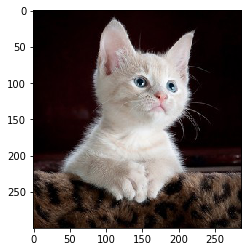

In [17]:
# Récupération de l'adresse URL d'une nouvelle image
lien_url2 = "https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/chaton01.jpg?raw=true"
img2 = Image.open(urlopen(lien_url2)) # Ouverture de cette image et enregistrement dans 'img2'
plt.imshow(img2) # Affichage de l'image

**Q4 :** Calculez la taille pixels de cette image

In [18]:
largeur, hauteur = img2.size
print("L'image totalise", largeur*hauteur , "pixels")

L'image totalise 86100 pixels


Le code ci-dessous permet de parcourir tous les points de l'image de la ligne 100, de la colonne 136 à 144.  

In [19]:
for x in range (136,145): # x prend toutes les valeurs  de 136 inclu à 145 exclu
    code_couleur = img2.getpixel((x,100)) # On mémorie le code couleur du point (x,100)
    print(code_couleur, end="") # On affiche les codes couleurs

(222, 225, 230)(219, 226, 232)(222, 231, 240)(144, 157, 166)(98, 115, 125)(132, 150, 162)(90, 110, 121)(50, 69, 83)(0, 14, 26)

![Parcourir_une_ligne](https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/ligne_oeil_chat.png?raw=true)

<div id="niveaux_gris"></div>

## Premiers filtres: Image en niveaux de gris et détection de seuil

On passe aux choses sérieuses!  
<div class = "alert alert-success">
Nous savons :
    
- parcourir une ligne d'une image  
- récupérer le code couleur de chaque point  
- le modifier  
    
Nous allons pouvoir faire des modifications sur l'image.  </div>

<u>Premier objectif:</u> Transformer une image en niveaux de gris.  
On commence par charger une nouvelle image.

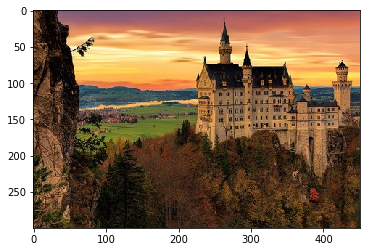

In [20]:
lien_url3 = "https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/chateau01.jpg?raw=true"
img3 = Image.open(urlopen(lien_url3))
plt.imshow(img3)

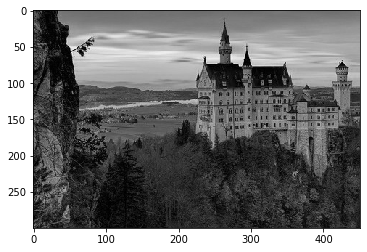

In [21]:
largeur, hauteur = img3.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur): # Pour chaque ligne, on parcourt chaque colonne
        r,v,b = img3.getpixel((x,y)) # r, v et b récupèrent les valeurs des 3 canaux (rouge, vert et bleu)
        g = (r+v+b)//3 # On calcul la moyenne des 3 canaux (arrondi à l'inférieur)
        img3.putpixel((x,y),(g,g,g)) # On impose ce même niveau aux 3 canaux
        
plt.imshow(img3) # On affiche le résultat

<u>Deuxième objectif:</u> Créer une détection de seuil.  
Si le niveau de gris est inférieur à 50, on force un noir profond (0,0,0), sinon, le pixel sera blanc (255,255,255)

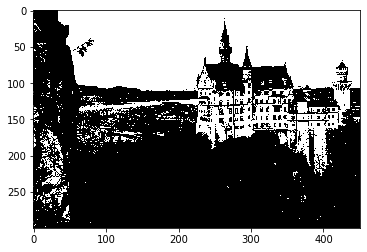

In [22]:
img3 = Image.open(urlopen(lien_url3)) # On recharge l'image d'origine
largeur, hauteur = img3.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur): # Pour chaque ligne, on parcourt chaque colonne
        r,v,b = img3.getpixel((x,y)) # r, v et b récupèrent les valeurs des 3 canaux (rouge, vert et bleu)
        g = (r+v+b)//3 # On calcul la moyenne des 3 canaux (arrondi à l'inférieur)
        if g < 100:
            img3.putpixel((x,y),(0,0,0)) # On impose un pixel noir
        else:
            img3.putpixel((x,y),(255,255,255)) # On impose le blanc
        
plt.imshow(img3) # On affiche le résultat

**Q5 :** Modifiez la détection de seuil pour imposer du bleu si le seuil est inférieur à 80, sinon du rouge.

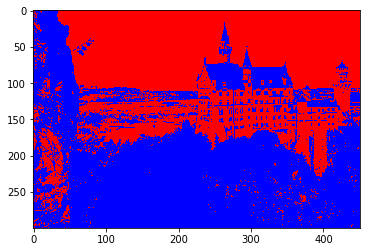

In [23]:
img3 = Image.open(urlopen(lien_url3)) # On recharge l'image d'origine
largeur, hauteur = img3.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur): # Pour chaque ligne, on parcourt chaque colonne
        r,v,b = img3.getpixel((x,y)) # r, v et b récupèrent les valeurs des 3 canaux (rouge, vert et bleu)
        g = (r+v+b)//3 # On calcul la moyenne des 3 canaux (arrondi à l'inférieur)
        if g < 80:
            img3.putpixel((x,y),(0,0,255)) # On impose un pixel bleu
        else:
            img3.putpixel((x,y),(255,0,0)) # On impose le rouge
        
plt.imshow(img3) # On affiche le résultat

<div id="filtres_chromatiques"></div>

## Filtres chromatiques: Modifer les couleurs</a>  

La structure sera la même sur les prochains programmes:
- Je charge l'image
- Je récupère les dimensions
- Je parcours chaque pixel
- Sur chaque pixel je lis le code couleur de ce point
- J'opère une transformation sur les valeurs des canaux
- Je force la nouvelle couleur du pixel

**Q6 :** Pour faire un filtre négatif, il faut calculer le complément à 255 pour chaque canal:  
`r = 255 - r` (pour le rouge)

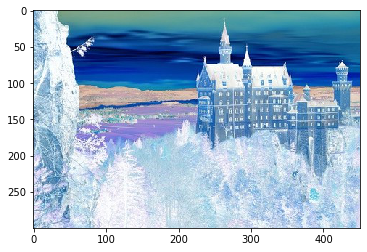

In [24]:
img3 = Image.open(urlopen(lien_url3)) # On recharge l'image d'origine
largeur, hauteur = img3.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur): # Pour chaque ligne, on parcourt chaque colonne
        r,v,b = img3.getpixel((x,y)) # r, v et b récupèrent les valeurs des 3 canaux (rouge, vert et bleu)
        r = 255 - r
        v = 255 - v
        b = 255 - b
        img3.putpixel((x,y),(r,v,b)) # On impose un pixel bleu
        
plt.imshow(img3) # On affiche le résultat

**Q7 :** On peut s'amuser à simuler la vision d'une personne atteinte de daltonisme (ou dyschromatopsie):  
Le rouge et le vert sont confondus. On va calculer la valeur moyenne entre ces 2 couleurs.  
`d = (r + v)//2`  
Et on impose cette  valeur aux canaux rouge et vert.  Le bleu est inchangé.

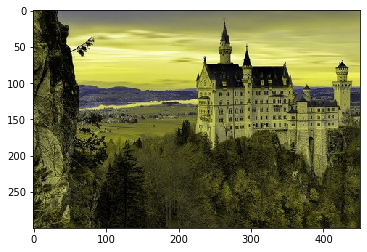

In [25]:
img3 = Image.open(urlopen(lien_url3)) # On recharge l'image d'origine
largeur, hauteur = img3.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur): # Pour chaque ligne, on parcourt chaque colonne
        r,v,b = img3.getpixel((x,y)) # r, v et b récupèrent les valeurs des 3 canaux (rouge, vert et bleu)
        d = (r+v)//2 # On calcul la moyenne des 3 canaux (arrondi à l'inférieur)
        img3.putpixel((x,y),(d,d,b)) # On impose un pixel bleu
        
plt.imshow(img3) # On affiche le résultat

**Q8 :** Permuttez les couleurs.  
Il faut utiliser une variable intermédiaire pour réaliser la permutation des canaux.  
`tempo ← r`  
`r ← v`  
`v ← b`  
`b ← tempo` 

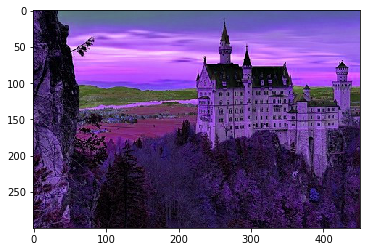

In [26]:
img3 = Image.open(urlopen(lien_url3)) # On recharge l'image d'origine
largeur, hauteur = img3.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur): # Pour chaque ligne, on parcourt chaque colonne
        r,v,b = img3.getpixel((x,y)) # r, v et b récupèrent les valeurs des 3 canaux (rouge, vert et bleu)
        tempo  = r
        r = v
        v = b
        b = tempo
        img3.putpixel((x,y),(r,v,b)) # On impose un pixel bleu
        
imgplot =plt.imshow(img3) # On affiche le résultat

<div id="filtres_geometriques"></div>

## Filtres géométriques: Modifier la forme

Pour finir, il est possible de faire des transformations de forme: Rotation, symétries, zoom, déformation....  
Certaines de ces transformations sont déjà disponibles dans la <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html">bibliothèque **PIL**</a>.  
On charge une nouvelle image ...

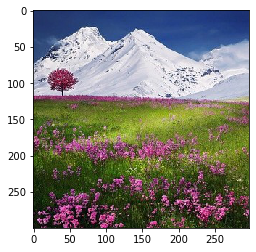

In [27]:
lien_url4 = "https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/montagne.jpg?raw=true"
img4 = Image.open(urlopen(lien_url4))
plt.imshow(img4)

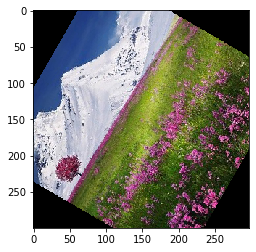

In [29]:
imgr = img4.rotate(60) # Méthode permettant une rotation. Vous pouvez changer l'angle pour voir.
plt.imshow(imgr) # On affiche le résultat de la rotation.

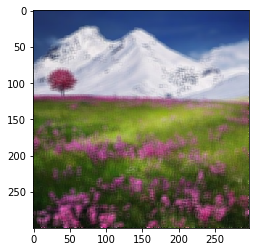

In [30]:
from PIL import ImageFilter # Importation de la bibliothèque
img4 = Image.open(urlopen(lien_url4)) # On recharge l'image originale
imgb = img4.filter(filter=ImageFilter.BLUR) # imgr récupère le résultat du filtre de floutage
plt.imshow(imgb) # On affiche le résultat

**Q9 Défi ultime:**  
En partant des programmes précédents, construisez un filtre qui fasse: un grossissement par 2 de l'image, une symétire verticale ou une autre transformation de votre choix.

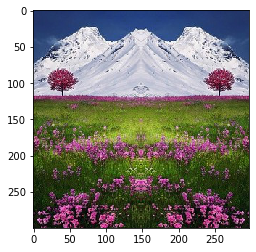

In [33]:
# Symétrie verticale
img4 = Image.open(urlopen(lien_url4)) # On recharge l'image originale
largeur, hauteur = img4.size # Récupération des dimensions de l'image
for y in range (hauteur): # On parcourt toute les lignes de l'image
    for x in range(largeur//2): # Pour chaque ligne, on parcourt chaque colonne
        # Transformation à programmer
        r,v,b = img4.getpixel((x,y))
        img4.putpixel((largeur-x-1,y),(r,v,b))
        
imgplot =plt.imshow(img4) # On affiche le résultat

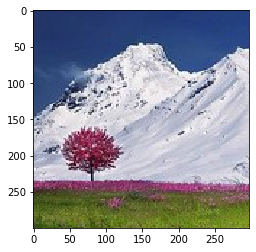

In [34]:
# Zoom * 2
img4 = Image.open(urlopen(lien_url4)) # On recharge l'image originale
largeur, hauteur = img4.size # Récupération des dimensions de l'image
imgz = Image.new(mode = "RGB", size = (largeur, hauteur)) # Création d'une nouvelle image
for y in range (hauteur//2): # On parcourt toute les lignes de l'image
    for x in range(largeur//2): # Pour chaque ligne, on parcourt chaque colonne
        # Transformation à programmer
        r,v,b = img4.getpixel((x,y))
        imgz.putpixel((2*x,2*y),(r,v,b))
        imgz.putpixel((2*x+1,2*y),(r,v,b))
        imgz.putpixel((2*x,2*y+1),(r,v,b))
        imgz.putpixel((2*x+1,2*y+1),(r,v,b))
        
imgplot =plt.imshow(imgz) # On affiche le résultat

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. Juin 2020 -</p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)

<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">Source des images: <a href="https://pixabay.com/">pixabay.com/</a></p>